In [2]:
import sys  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm
from ipywidgets import interact

sys.path.insert(0, '../../')
from mystatlearn.interpolation import CubicSpline
from mystatlearn.regression import CubicSplineRegression
from mystatlearn.visualise import plotly_widgets, setup_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2
setup_notebook()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Natural Cubic Splines

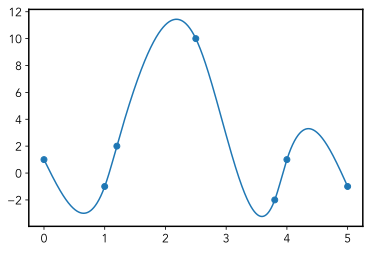

In [2]:
# define the joints
X = np.array([0, 1, 1.2, 2.5, 3.8, 4, 5])
y = np.array([1, -1, 2, 10, -2, 1, -1])

# fit the cubic spline
spline = CubicSpline()
spline.fit(X, y)

# plot the results
xs = np.linspace(0, 5, 1000)
y_fit = spline.interpolate(xs)
plt.scatter(X, y)
plt.plot(xs, y_fit)
plt.show()

## Cubic smoothin spline

Given a set of observations $\{(x_i, y_i)\}_{i=1}^{n}$, modeled by the relation $Y_i = f(x_i) + \epsilon_i$. The cubic  smoothin spline estimate $\hat{f}$ of the function $f$ is defined to be the minimizer of:
$$\sum_{i=1}^{n}(y_i - \hat{f}(x_i))^2 + \lambda \int \hat{f}''(x)^2 dx$$

We can think of fitting a smooting spline in two steps:
1. First, derive the 'optimal' fitted values $\hat{f}(x_i)$, $i = 1, \ldots, n$
2. For any $x$, $f(x)$ is the value of the interpolating, cubic spline for given observations $\{(x_i, \hat{f}(x_i)\}_{i=1}^n$

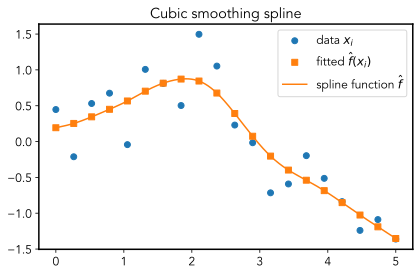

In [3]:
# generate the data
n = 20
X = np.linspace(0, 5, n)
y = np.sin(X) + norm.rvs(size=n, scale=0.4)

# get predicted and fitted values
model = CubicSplineRegression(penalty=0.1)
y_fit = model.fit_transform(X, y)
y_pred = model.predict(xs)
xs = np.linspace(0, 5, 1000)

# plot the results
fig, ax = plt.subplots()
ax.set_title("Cubic smoothing spline")
ax.scatter(X, y, marker='o', label='data $x_i$')
ax.scatter(X, y_fit, color='C1', marker='s', label='fitted $\hat{f}(x_i)$')
ax.plot(xs, y_pred, color='C1', label='spline function $\hat{f}$')
ax.legend()
fig.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


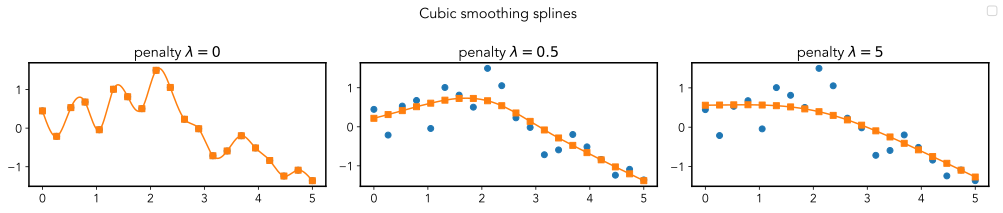

In [4]:
# fit the model for three lambda paramters
penalties = [0, 0.5, 5]
models = dict(zip(
    penalties, [CubicSplineRegression(penalty=c) for c in penalties]))

# get predicted and fitted values
y_fit = dict(zip(
    penalties, [models[c].fit_transform(X, y) for c in penalties]))
y_pred = dict(zip(
    penalties, [models[c].predict(xs) for c in penalties]))

# plot the results
fig, axs = plt.subplots(1, 3, figsize=(14, 3))
fig.suptitle("Cubic smoothing splines")
for ax, c in zip(axs.ravel(), penalties):
    ax.scatter(X, y, marker='o')
    ax.scatter(X, y_fit[c], color='C1', marker='s')
    ax.plot(xs, y_pred[c], color='C1')
    ax.set_title(f'penalty $\lambda = {c}$')
fig.legend()
fig.tight_layout()
plt.show()

In [5]:
# generate the data
n = 50
X = np.linspace(0, 10, n)
y = (1 + 2 * X + 1 * X**2 -  0.1 * X**3) * np.cos(X) + norm.rvs(size=n, scale=5)
xs = np.linspace(X.min(), X.max(), 100)

# create plotly figure
fig = plotly_widgets(
    X, y, xs, title='Natural smoothing splines', scatter_name='spline function')
@interact(penalty=(0, 50, 0.1))
def update(penalty=0.5):
    with fig.batch_update():
        model = CubicSplineRegression(penalty=penalty)
        model.fit(X, y)
        y_pred = model.predict(xs)
        fig.data[0].x=xs
        fig.data[0].y=y_pred
fig


interactive(children=(FloatSlider(value=0.5, description='penalty', max=50.0), Output()), _dom_classes=('widge…

FigureWidget({
    'data': [{'line': {'color': '#ff7f0e'},
              'name': 'spline function',
          …